In [1]:
!pip install -U sentence-transformers



     |████████████████████████████████| 85 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.7 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125919 sha256=955cb86338db923ee144dc9b3b0c86b7aa981babb373ea5c13760789bc5435d3
  Stored in directory: /Users/vanisachdev/Library/Caches/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
import pandas as pd
df = pd.read_json("/Users/vanisachdev/Desktop/github/p-recommender/data_science/cleaned_data5scheduler.json")

In [3]:
df.head()

,title,identifier,description,source,credits,instructors,offered,prerequisites,corequisites,currently_offered,fee
0,Introduction to American Cultures,AMST-103-HM,An interdisciplinary introduction to principal...,HarveyMudd,100,[Staff],,,,False,0
1,Print and American Culture,AMST-115-HM,Covers numerous developments in American print...,HarveyMudd,100,[Anup Gampa],,,,True,0
2,Hyphenated Americans,AMST-120-HM,A focus on the experience of immigrants in the...,HarveyMudd,100,[Balseiro],,,,False,0
3,"Life: Knowledge, Belief, and Cultural Practices",ANTH-110-HM,An exploration of cultural attitudes toward li...,HarveyMudd,100,[de Laet],,,,False,0
4,Introduction to the Anthropology of Science an...,ANTH-111-HM,An introduction to science and technology as c...,HarveyMudd,100,[Marianne De Laet],,,,True,0


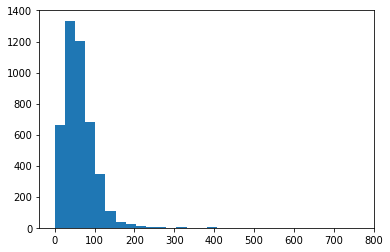

In [4]:
import matplotlib.pyplot as plt

lens = [len(x.split()) for x in df['description']]

plt.hist(lens, bins=30)
plt.show()

In [8]:
# Import library, utilities 
from sentence_transformers import SentenceTransformer, util
import torch

# Set embedding model and max_seq_len and push to GPU
embedder = SentenceTransformer('bert-base-uncased')
# embedder.to('cuda')
# going a little longer for user inputed synopsis
embedder.max_seq_len = 128

No sentence-transformers model found with name /Users/vanisachdev/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/vanisachdev/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassific

In [9]:
titles = df['title'].tolist()
description = df['description'].tolist()

In [11]:
story_embeddings = embedder.encode(description, convert_to_tensor=True)


KeyboardInterrupt: 